In [9]:
from pathlib import Path
import itertools

import numpy as np
# https://matplotlib.org/gallery/lines_bars_and_markers/curve_error_band.html#sphx-glr-gallery-lines-bars-and-markers-curve-error-band-py
from scipy.interpolate import splprep, splev


import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib import rcParams


import themepy
paper_path = Path('../../../paper/figures/')
slide_path = Path('../../../slides/figures/math/')
proposal_path = Path('../../../draft/figures/math/')
theme = themepy.Theme('paper')
rcParams['font.family'] = 'Segoe Print'

%matplotlib inline

In [10]:
def scatter(ax, xpos):
    s = ax.scatter(xpos, [.3,.3,.3])
    circles = [mpatches.Circle((x, .7), radius=.1) for x in xpos]
    pc = mcollections.PatchCollection(circles, facecolor='C1', edgecolor=s.get_facecolor(), zorder=4)
    ax.add_collection(pc)
    ax.annotate(r'$\alpha$', (0.73, 0.53), fontsize=14)
    ax.annotate(r'$\beta$', (0.87, 0.67), fontsize=14)

    ax.annotate(r'$k_0$', (0.20, 0.2), fontsize=14)
    ax.annotate(r'$k_1$', (0.45, 0.2), fontsize=14)
    ax.annotate(r'$k_2$', (0.70, 0.2), fontsize=14)

    ax.arrow(.5,.59, 0,-.25,head_width=0.02, head_length=0.015)
    ax.annotate(r'$\xi$', (.52,.45), fontsize=14)

In [11]:
def line(ax, xposl):
    l = ax.axhline(y=.3, xmin=xposl[0], xmax=xposl[-1])
    b1 = mpatches.Rectangle((xposl[0], 0.6), height=.2, width=(xposl[-1]-xposl[0]), 
                            facecolor='C1', edgecolor=l.get_color())
    ax.add_patch(b1)
    x = np.linspace(-2*np.pi, np.pi*2, 1000)
    inds = ((x>xposl[0]) & (x<xposl[-1]))
    y = np.sin(x*20)*.07 + .7
    #ax.plot(x[inds], y[inds], color='C1', linewidth=4)


    ax.annotate(r'$\alpha$',(0.7, 0.53), fontsize=14)
    ax.annotate(r'$\beta$', (0.82, 0.67), fontsize=14)
    ax.annotate(r'$k_0$', (0.45, 0.2), fontsize=14)
    ax.annotate(r'$\xi$', (0.52, 0.45), fontsize=14)
    ax.arrow(.5, .59, 0, -.26,  head_width=0.02, head_length=0.015)


In [12]:
def image(ax):
    s1 = mpatches.Rectangle((0.45,0.02), .15, .15)
    ax.add_patch(s1)
    s2 = mpatches.Rectangle((0.2, 0.3), .6, .6,facecolor='C1', edgecolor='C0')
    ax.add_patch(s2)
    smile = mpatches.Circle((.5,.6), radius=.25, facecolor=ax.get_facecolor(), edgecolor='C1', hatch='Ox')
    #ax.add_patch(smile)
    ax.annotate(r'$\alpha$', (0.7, 0.23), fontsize=14)
    ax.annotate(r'$\beta$', (0.82, 0.6), fontsize=14)
    p1 = mpatches.FancyArrowPatch((.85, 0.59), (0.59, 0.19), connectionstyle="arc3,rad=-.8",arrowstyle="-|>", mutation_scale=1)
    ax.add_patch(p1)
    p2 = mpatches.FancyArrowPatch((.7, 0.24), (0.59, 0.17), arrowstyle="-|>",  mutation_scale=15)
    ax.add_patch(p2)
    ax.annotate(r'$\xi$', (.9, .3), fontsize=14)
    ax.annotate(r'$k_0$', (.39,-.04), fontsize=14)     

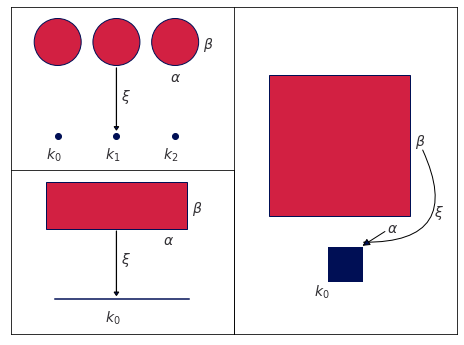

In [13]:
#paper_figure
fig, axd = plt.subplot_mosaic([['circle', 'image'], ['line', 'image']], figsize=(8,8), 
                                  gridspec_kw={'wspace':0, 'hspace':-0.4, 'width_ratios':[1,1]})

scatter(axd['circle'], [.25,.5,.75])
line(axd['line'], [.2, .6, .8])
image(axd['image'])

for k in axd.keys():
    axd[k].set_aspect("equal")
    axd[k].set(xticks=[], yticks=[])
    axd[k].set_facecolor("white")
    #axd[k].axis('off')
    
axd['circle'].set(xlim=(.05,1), ylim=(.15,.85))
axd['line'].set(xlim=(.05,1), ylim=(.15,.85))
axd['image'].set(xlim=(.05,1), ylim=(-.2,1.19))
fig.savefig(paper_path/"retraction_maps.png", bbox_inches='tight', facecolor='white' )

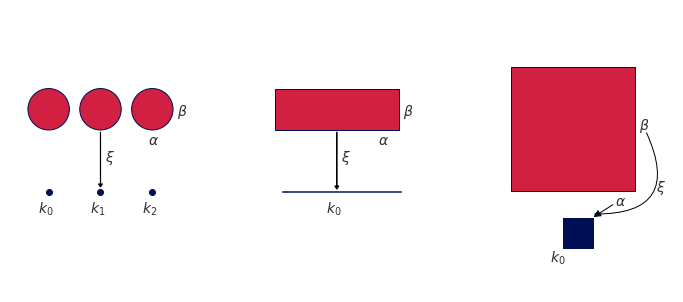

In [14]:
fig, axd = plt.subplot_mosaic([['circle', 'line', 'image']], figsize=(12,8))

scatter(axd['circle'], [.25,.5,.75])
line(axd['line'], [.2, .6, .8])
image(axd['image'])

for k in axd.keys():
    axd[k].set_aspect("equal")
    axd[k].set(xticks=[], yticks=[])
    axd[k].set_facecolor("white")
    axd[k].axis('off')
    
axd['circle'].set(xlim=(.05,1), ylim=(.15,.85))
axd['line'].set(xlim=(.05,1), ylim=(.15,.85))
axd['image'].set(xlim=(.05,1), ylim=(-.2,1.19))
fig.savefig(slide_path/"image_s.png", bbox_inches='tight', facecolor='white' )
fig.savefig(proposal_path/"retraction_maps.png", bbox_inches='tight', facecolor='white')

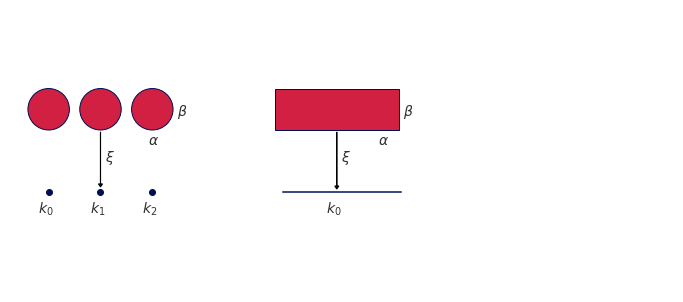

In [15]:
fig, axd = plt.subplot_mosaic([['circle', 'line', 'image']], figsize=(12,8))

scatter(axd['circle'], [.25,.5,.75])
line(axd['line'], [.2, .6, .8])
#image(axd['image'])

for k in axd.keys():
    axd[k].set_aspect("equal")
    axd[k].set(xticks=[], yticks=[])
    axd[k].set_facecolor("white")
    axd[k].axis('off')
    
axd['circle'].set(xlim=(.05,1), ylim=(.15,.85))
axd['line'].set(xlim=(.05,1), ylim=(.15,.85))
axd['image'].set(xlim=(.05,1), ylim=(-.2,1.19))
fig.savefig(slide_path/"line_s.png", bbox_inches='tight', facecolor='white' )

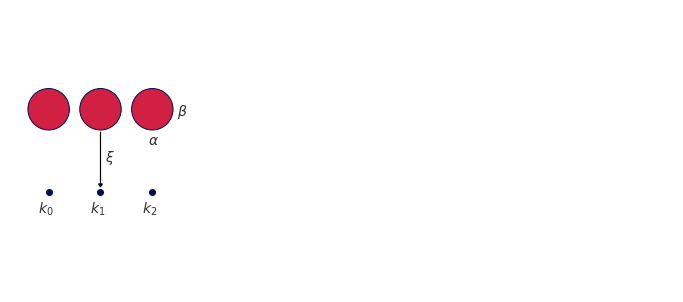

In [16]:
fig, axd = plt.subplot_mosaic([['circle', 'line', 'image']], figsize=(12,8))

scatter(axd['circle'], [.25,.5,.75])
#line(axd['line'], [.2, .6, .8])
#image(axd['image'])

for k in axd.keys():
    axd[k].set_aspect("equal")
    axd[k].set(xticks=[], yticks=[])
    axd[k].set_facecolor("white")
    axd[k].axis('off')
    
axd['circle'].set(xlim=(.05,1), ylim=(.15,.85))
axd['line'].set(xlim=(.05,1), ylim=(.15,.85))
axd['image'].set(xlim=(.05,1), ylim=(-.2,1.19))
fig.savefig(slide_path/"scatter_s.png", bbox_inches='tight', facecolor='white' )

In [17]:
N = 400
t = np.linspace(0, 2 * np.pi, N)
r = (0.5 + np.cos(t))
x, y = r * np.cos(t), r * np.sin(t)

err = 0.05 * np.sin(2 * t) ** 2 + 0.04 + 0.02 * np.cos(9 * t + 2)

# calculate normals via derivatives of splines
tck, u = splprep([x, y], s=0)
dx, dy = splev(u, tck, der=1)
l = np.hypot(dx, dy)
nx = dy / l
ny = -dx / l

# end points of errors
xp = x + nx * err
yp = y + ny * err
xn = x - nx * err
yn = y - ny * err

vertices = np.block([[xp, xn[::-1]],
                     [yp, yn[::-1]]]).T
codes = mpath.Path.LINETO * np.ones(len(vertices), dtype=mpath.Path.code_type)
codes[0] = codes[len(xp)] = mpath.Path.MOVETO


In [72]:
vertices[-3:]

array([[1.47167660e+00, 4.57955956e-02],
       [1.47045883e+00, 2.28506787e-02],
       [1.46832294e+00, 9.29462985e-08]])

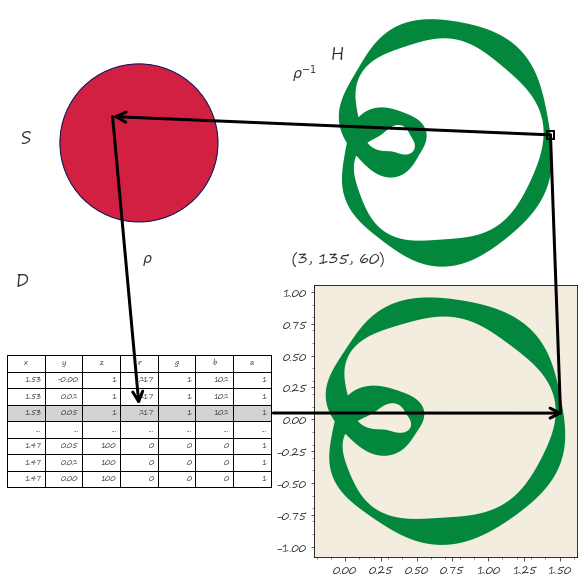

In [120]:
black = (0,0,0)
face_r =  (217,1,102)
face_h = mcolors.to_rgba('C2')
face_h_label = "(3, 135, 60)"
edge_r = black
edge_h = None
alpha=1

sub = 3
columns = ['x', 'y', 'z', 'r', 'g', 'b', 'a']
band = [(f'{xi:.2f}', f'{yi:.2f}', 1, face_r[0], face_r[1], face_r[2], alpha) for xi,yi in vertices[:sub]] 
line = [(f'{xi:.2f}', f'{yi:.2f}', 100, edge_r[0], edge_r[1], edge_r[2], alpha) for xi, yi in vertices[-sub:]]
middle = ['...' for _ in range(7)]
r7 = np.vstack([band, middle, line])
row = 2


fig, axd = plt.subplot_mosaic([['simplex', 'ideal'], ['bundle', 'screen']], 
                              constrained_layout=True, figsize=(8,8))
tab = axd['bundle'].table(r7,colLabels=columns, loc='center', fontsize=12 )
axd['bundle'].axis('off')
axd['bundle'].annotate("D", (1.05, 1.65), fontsize=16)

fx, fy = (0.4, 0.6)
circle = mpatches.Circle((.5,.5), .3, facecolor='C1', edgecolor='C0')
axd['simplex'].add_patch(circle)
axd['simplex'].scatter(fx, fy, s=25, color='k')
axd['simplex'].annotate("S", (.05, .5), fontsize=16)
axd['simplex'].set(aspect='equal', xlim=(0,1), ylim=(0,1))
axd['simplex'].axis('off')

path = mpath.Path(vertices, codes)
patch = mpatches.PathPatch(path, facecolor=face_h, edgecolor='none')
axd['ideal'].add_patch(patch)

axd['ideal'].plot(x, y, color='C2')
axd['ideal'].set(aspect='equal')
axd['ideal'].axis('off')
axd['ideal'].annotate("H", (-.2, .65), fontsize=16)
rect = mpatches.Rectangle((vertices[row,0]-.03, vertices[row,1]-.03), .06, .06, facecolor='none', edgecolor='k', linewidth=2, zorder=110)
axd['ideal'].add_patch(rect)


axd['screen'].plot(x, y, color='C2')

path = mpath.Path(vertices, codes)
patch = mpatches.PathPatch(path, facecolor=face_h, edgecolor='none')
axd['screen'].add_patch(patch)


axd['screen'].set(aspect='auto')
axd['screen'].xaxis.set_minor_locator(mticker.MultipleLocator(.1))
axd['screen'].yaxis.set_minor_locator(mticker.MultipleLocator(.1))
#axd['screen'].grid(which='minor')

asize=3
ms=25
rxy = (vertices[row,0], vertices[row,1])
graphic_design = mpatches.ConnectionPatch(xyA=(rxy[0]-.02,rxy[1]), coordsA=axd['screen'].transData,
                      xyB=rxy, coordsB=axd['ideal'].transData,linewidth=asize, mutation_scale=ms)
fig.add_artist(graphic_design)

design_base = mpatches.ConnectionPatch(xyA=rxy, coordsA=axd['ideal'].transData,
                         xyB=(fx, fy), coordsB=axd['simplex'].transData, arrowstyle='->',
                                       linewidth=asize,mutation_scale=ms)
fig.add_artist(design_base)
    
base_fiber = mpatches.ConnectionPatch(xyA=(fx,fy), coordsA=axd['simplex'].transData,
                         xyB=(.5, .56), coordsB=axd['bundle'].transData,   
                         arrowstyle="->", linewidth=asize,mutation_scale=ms)
fig.add_artist(base_fiber)

fiber_graphic = mpatches.ConnectionPatch(xyA=(1.01,.53), coordsA=axd['bundle'].transData,
                         xyB=rxy, coordsB=axd['screen'].transData, arrowstyle='->', 
                                         linewidth=asize, mutation_scale=ms)
                                         
fig.add_artist(fiber_graphic)
for i in range(7):
    tab[(3,i)].set_color('lightgray')
    tab[(3,i)].set_edgecolor('k')

fig.text(.5,.87, r"$\rho^{-1}$", fontsize=14)
fig.text(.24, .55, r"$\rho$", fontsize=14)
fig.text(.5, .55, face_h_label, fontsize=14)
fig.text(0.02,.5, "D", fontsize=16, va='bottom')

fig.savefig(proposal_path/"render.png", bbox_inches='tight', facecolor='white')

In [58]:
rxy

(1.5289212669192251, 0.024385458869690114)

In [60]:
vertices[:sub]

array([[ 1.53167706e+00, -9.29462985e-08],
       [ 1.52892127e+00,  2.43854589e-02],
       [ 1.52584431e+00,  4.86415426e-02]])

In [63]:
r7

array([['1.53', '-0.00', '1', '217', '1', '102', '1'],
       ['1.53', '0.02', '1', '217', '1', '102', '1'],
       ['1.53', '0.05', '1', '217', '1', '102', '1'],
       ['...', '...', '...', '...', '...', '...', '...'],
       ['1.50', '0.00', '100', '0', '0', '0', '1'],
       ['1.50', '0.02', '100', '0', '0', '0', '1'],
       ['1.50', '0.05', '100', '0', '0', '0', '1']], dtype='<U5')